In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
file_path = "../scripts/data/csvs/PFL.csv"
df = pd.read_csv(file_path)

# Resetting the index and updating the DataFrame in place
df = df.reset_index(drop=True)

# Dropping the specified columns
df = df.drop(columns=['published_date', 'status','traded_quantity','per_change'])

df.head()

,open,high,low,close,traded_amount
0,98.0,97.0,96.0,96.0,1930.0
1,96.0,95.0,92.0,92.0,12316.0
2,92.0,91.0,91.0,91.0,5460.0
3,91.0,92.0,92.0,92.0,4600.0
4,92.0,93.0,93.0,93.0,18786.0


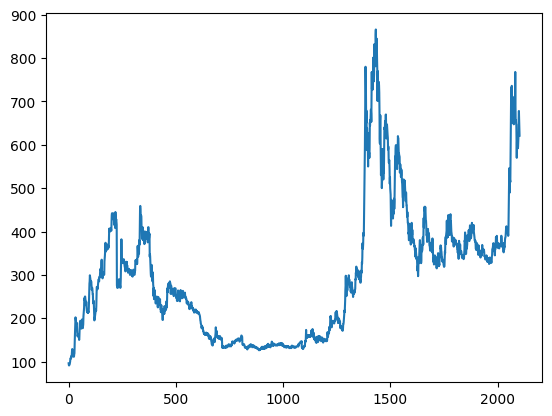

In [3]:
plt.plot(df.close)

In [4]:
ma100 = df.close.rolling(100).mean()
ma100

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
2098    496.363
2099    499.443
2100    502.383
2101    505.123
2102    507.703
Name: close, Length: 2103, dtype: float64

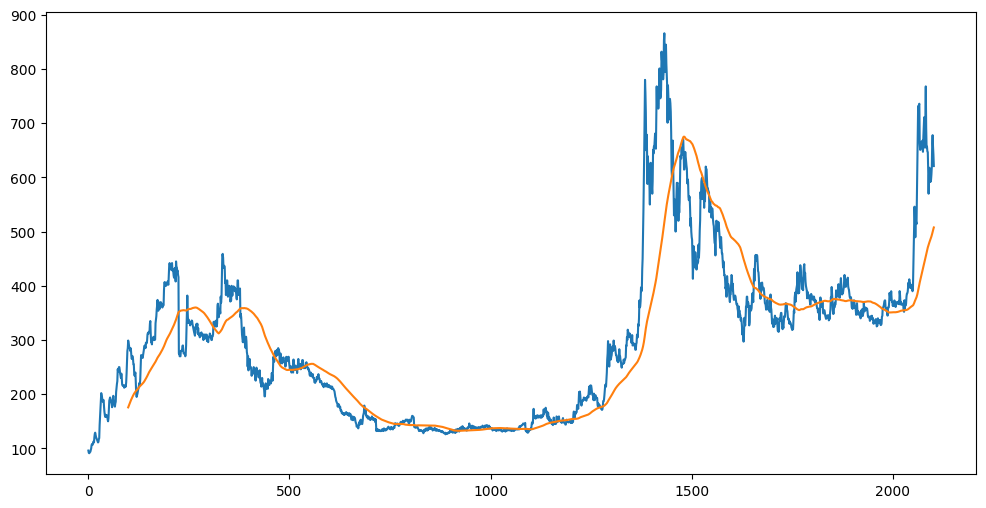

In [5]:
plt.figure(figsize=(12,6))
plt.plot(df.close)
plt.plot(ma100)

In [6]:
ma200 = df.close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2098    423.6885
2099    425.2785
2100    426.7765
2101    428.1715
2102    429.4465
Name: close, Length: 2103, dtype: float64

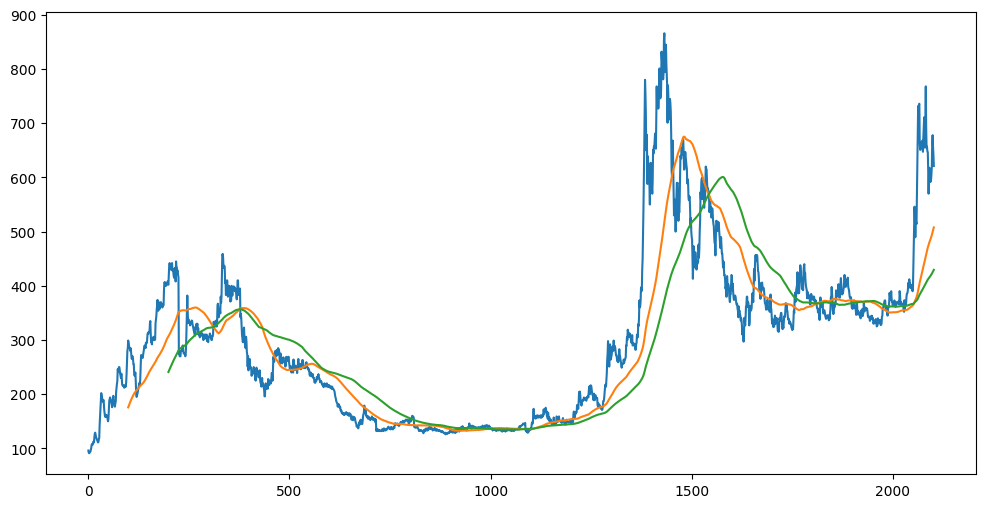

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df.close)
plt.plot(ma100)
plt.plot(ma200)

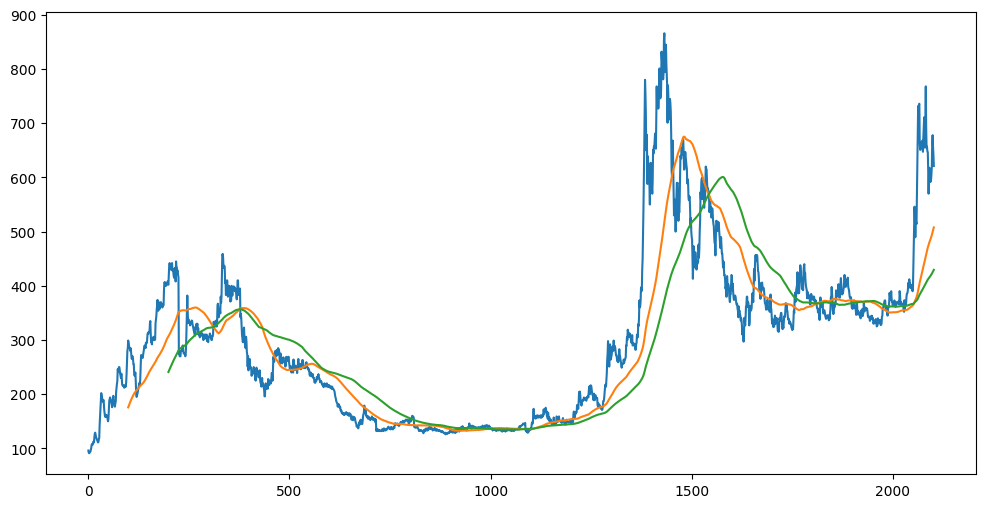

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.close)
plt.plot(ma100)
plt.plot(ma200)

In [9]:
data_training=pd.DataFrame(df['close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['close'][int(len(df)*0.70):int(len(df))])
print(data_training)

      close
0      96.0
1      92.0
2      91.0
3      92.0
4      93.0
...     ...
1467  520.0
1468  551.0
1469  535.0
1470  554.0
1471  596.0

[1472 rows x 1 columns]


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00645161],
       [0.00129032],
       [0.        ],
       ...,
       [0.57290323],
       [0.59741935],
       [0.6516129 ]])

In [11]:
data_training_array.shape


(1472, 1)

In [12]:
x_train=[]
y_train=[]
for i in range (100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train, y_train = np.array(x_train),np.array(y_train)

In [13]:
from keras.layers import Dense, Dropout, LSTM,Input
from keras.models import Sequential

2024-06-30 12:20:26.889751: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-30 12:20:27.616070: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-30 12:20:28.264938: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-30 12:20:34.572015: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [14]:
model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=1))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - loss: 0.0356
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - loss: 0.0071
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - loss: 0.0064
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - loss: 0.0044
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - loss: 0.0053
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - loss: 0.0052
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - loss: 0.0040
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - loss: 0.0039
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - loss: 0.0046
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - loss: 0.0039
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - loss: 0.0031
Epoch 12/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - loss: 0.0034
Epoch 13/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - loss: 0.0034
Epoch 14/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - loss: 0.0035
Epoch 15/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - lo

In [16]:
model.save('keras_model.h5')

In [17]:
model.save('stock_model.keras')


In [18]:
data_testing.head()

,close
1472,640.0
1473,637.0
1474,635.0
1475,655.0
1476,642.0


In [19]:
past_100_days = data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [20]:
final_df.head()

,close
0,362.0
1,372.0
2,397.0
3,390.0
4,391.0


In [21]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.1142355 ],
       [0.13181019],
       [0.17574692],
       [0.16344464],
       [0.16520211],
       [0.23374341],
       [0.26889279],
       [0.33919156],
       [0.42530756],
       [0.51845343],
       [0.61862917],
       [0.73110721],
       [0.84885764],
       [0.80667838],
       [0.74340949],
       [0.62038664],
       [0.67135325],
       [0.6168717 ],
       [0.51142355],
       [0.60105448],
       [0.5711775 ],
       [0.56239016],
       [0.53251318],
       [0.50439367],
       [0.44463972],
       [0.54130053],
       [0.57996485],
       [0.53075571],
       [0.49560633],
       [0.50087873],
       [0.4797891 ],
       [0.5202109 ],
       [0.62214411],
       [0.60984183],
       [0.63268893],
       [0.62917399],
       [0.65553603],
       [0.67486819],
       [0.65887522],
       [0.62565905],
       [0.73989455],
       [0.82776801],
       [0.75764499],
       [0.79613357],
       [0.77855888],
       [0.75571178],
       [0.77328647],
       [0.831

In [22]:
input_data.shape

(731, 1)

In [23]:
x_test=[]
y_test=[]
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
x_test,y_test = np.array(x_test), np.array(y_test)
print(x_test.shape, y_test.shape)

                  

(631, 100, 1) (631,)


In [24]:
predicted_y = model.predict(x_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


In [25]:
scaler.scale_

array([0.00175747])

In [26]:
scale_factor=1/0.00175747
predicted_y = predicted_y * scale_factor
y_test = y_test * scale_factor

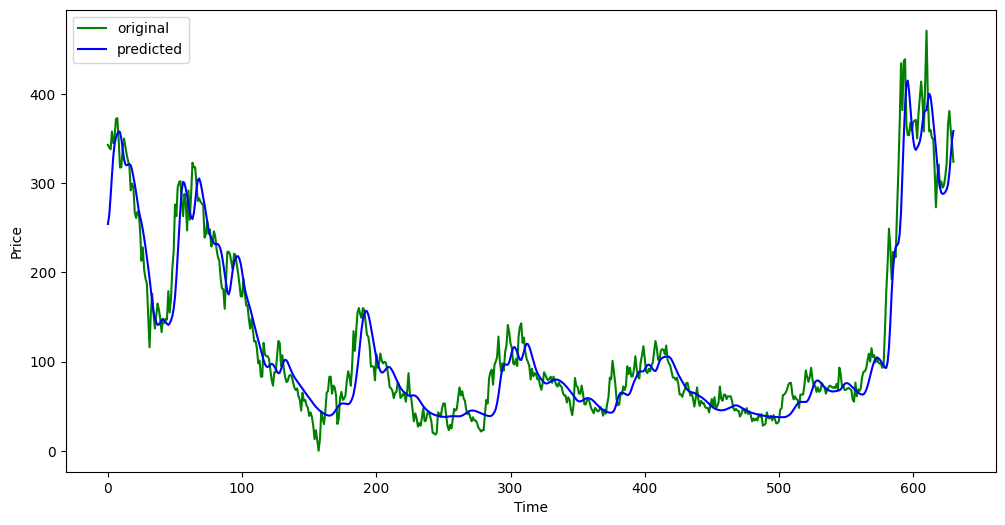

In [27]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'g', label="original")
plt.plot(predicted_y,'b',label="predicted")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [28]:

forecast_input = input_data[-100:]  # Use the last 100 days from the input_data
forecast = []


In [29]:
for _ in range(30):
    forecast_input = forecast_input.reshape((1, forecast_input.shape[0], forecast_input.shape[1]))
    next_pred = model.predict(forecast_input)[0]
    forecast.append(next_pred)
    forecast_input = np.append(forecast_input, next_pred).reshape((-1, 1))[1:]  # Shift and add the new prediction

forecast = np.array(forecast) * scale_factor

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

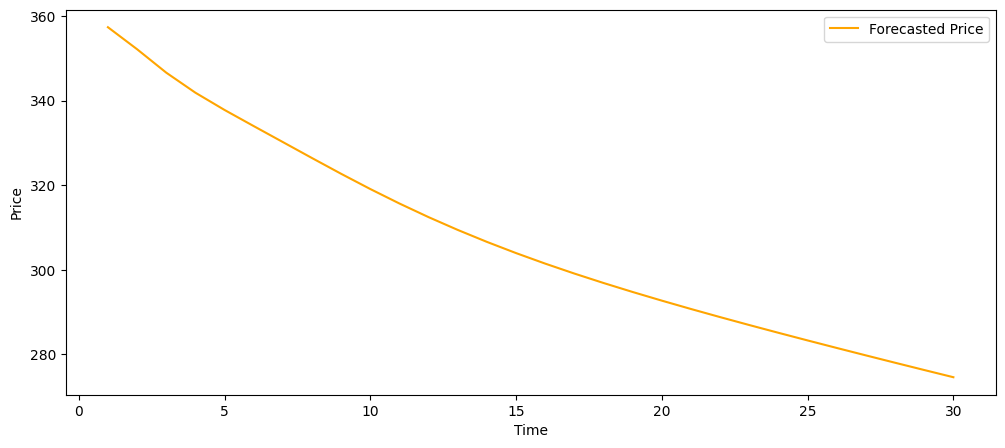

In [32]:
 
plt.figure(figsize=(12,5))
plt.plot(range(1, 31), forecast, 'orange', label='Forecasted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()